<a href="https://colab.research.google.com/github/vagadeeshwar/rating-recipe-reviews/blob/master/rating-recipe-reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'recipe-for-rating-predict-food-ratings-using-ml:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F67079%2F7452256%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240620%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240620T120344Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D26017ae3199665c52e0eae0c4f4ec83800538345f6ff3a5ef5100ea86fbd6cffc857ae038419fda3b37edab9332047562986740707473d6466b3fccbc76a89d085de515b6b97187f7c6092fc56f151da8d88b2000af1a2845aa9e05c795a8f28d4fefe9a022867871fa87adf0d9e259fe1a8cc9e209fdf1f86c7d04b283d04c43c4435ed793594fb5b25c2f96fffd4d645ca85d14401621bc952eb83ef6af8b5c8259103ea58f6cf47f7206b914683b91c500eb6620ce6f6829ae98344b079a72f8f856ae9bc5130c81a5b92646b2518bf4d70a95bff5000f7cfeb1a66e8efa6105500cfa41118a95795a4383d29e56b679554de003e734549303f58ed95f091,others:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4765976%2F8075909%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240620%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240620T120344Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5c4111e33dccb221f289b14f9e0d53e14abb222352126e1e869eb113a54f04a48c3e2fd6109f2587736ef24232455b05ae6d05b5159b75a1cfd14102a00d5b39ac5b0f434f935f6c80d8cd95c474ebae814ad4bc97b626aa1136abc2b87af4de0448806b99e736a876ebd7b49eca4594f1c6282e8a110cc836d17123dbf0e017868116a386de37e126d233721cf5d21f2fe179df2cf6092804d30d9596268ea8f076df2ec4ddcca7dc46a5cbfe8a39a0b20689ce6381bef295a6bc44812f88bdeec8ba7aa1d3f566977aaf1816664c6713ededaad5663c62495dbc35b0f35bc3889d1d7fb8f4971edd035aeac2ff852466bbd18c46d0c629aa8817f105032a41,dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4748833%2F8082832%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240620%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240620T120344Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D63d2ca22d5c2f1ec2f9aa173d440ec8e74a8caae542cec64a757b58722437c82c8b67208a7440009cf23bc25e135bfdbf87c5803fcd7ca11a0523ee2d3ae5fdaa7ad0dd18b610b9c31f3f0f8607542166890c690d8f093cf9e50a90ff4fab4988c55b864526d929cef3caabd9a5c88fbdeeea2d0e2a2f3019c95b56ef83962dba68ef85cb92c60f7b8f64217aea257a846e49a0836f149a4fe782502f6a32cca69670d9e1d0a92d5c475998dc3c5c87fe93a9c94ab171cd24ba2886c1bcd55aa920be81257631fc4f812480a3cef1b1f4f3b653e720c2575f5495708e35225dc072bbcd164e58d816e9e1fafa6ae1c7635a14f25ecfdbb5149d0afc7f3cc1519'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Initialization

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/stopwords.txt
/kaggle/input/dataset/knc_clf.pkl
/kaggle/input/dataset/xgb_clf.pkl
/kaggle/input/dataset/svc_clf.pkl
/kaggle/input/dataset/lg_clf.pkl
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/sample.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv
/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv
/kaggle/input/others/svc_400_feature.pkl


In [ ]:
# Read the data
X_full = pd.read_csv('../input/recipe-for-rating-predict-food-ratings-using-ml/train.csv', index_col='ID')
X_test = pd.read_csv('../input/recipe-for-rating-predict-food-ratings-using-ml/test.csv', index_col='ID')

y=X_full.Rating
X=X_full.drop("Rating",axis=1)

# EDA

In [ ]:
X_full.shape

(13636, 14)

In [ ]:
X_full.head()

,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
ID,,,,,,,,,,,,,,
70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...


In [ ]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13636 entries, 70 to 379
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RecipeNumber       13636 non-null  int64 
 1   RecipeCode         13636 non-null  int64 
 2   RecipeName         13636 non-null  object
 3   CommentID          13636 non-null  object
 4   UserID             13636 non-null  object
 5   UserName           13636 non-null  object
 6   UserReputation     13636 non-null  int64 
 7   CreationTimestamp  13636 non-null  int64 
 8   ReplyCount         13636 non-null  int64 
 9   ThumbsUpCount      13636 non-null  int64 
 10  ThumbsDownCount    13636 non-null  int64 
 11  Rating             13636 non-null  int64 
 12  BestScore          13636 non-null  int64 
 13  Recipe_Review      13634 non-null  object
dtypes: int64(9), object(5)
memory usage: 1.6+ MB


Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64


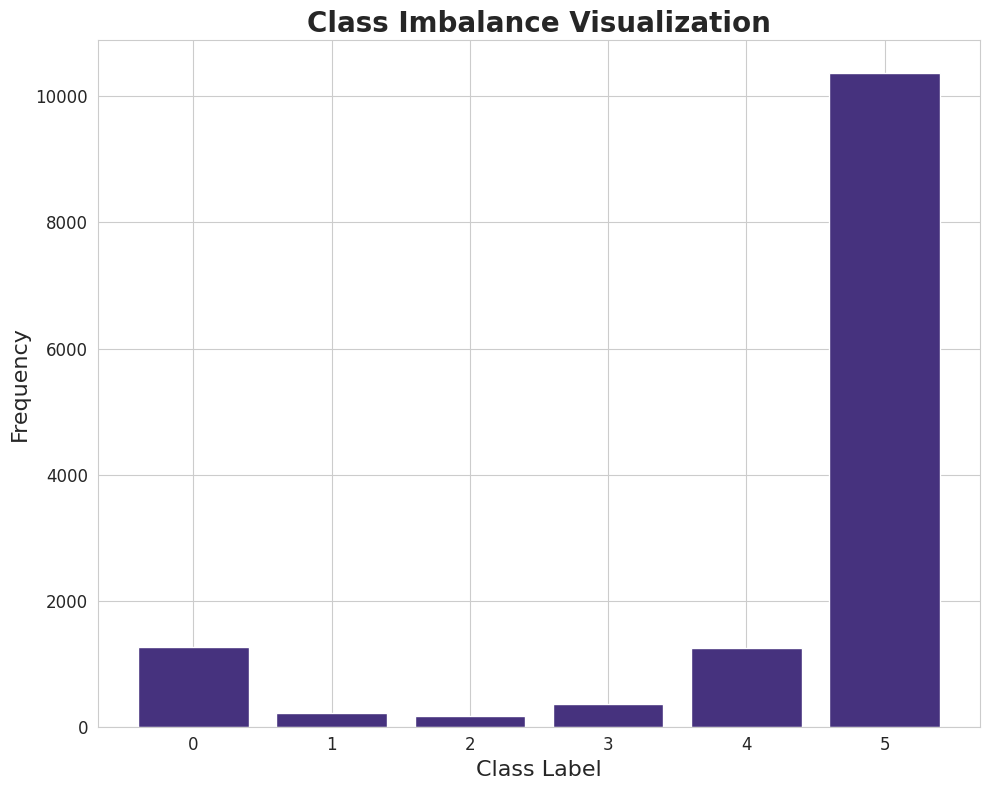

In [ ]:
print(y.value_counts())

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.set_palette("viridis")

class_counts = y.value_counts()
plt.bar(class_counts.index, class_counts.values)

plt.title("Class Imbalance Visualization", fontsize=20, fontweight="bold")
plt.xlabel("Class Label", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.xticks(class_counts.index, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

* Very Imbalanced Classes

In [ ]:
X_full.isnull().sum()

RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

* 2 Null Values in Recipe_Review

In [ ]:
X_full.index.value_counts()

ID
19     85
25     83
90     82
69     82
71     81
       ..
552     1
706     1
572     1
608     1
675     1
Name: count, Length: 701, dtype: int64

* X has duplicate IDs(index)... Comment ID performs like an index instead

In [ ]:
X.groupby('RecipeNumber')['RecipeCode'].count()

RecipeNumber
1      483
2      372
3      553
4      249
5      140
      ... 
96      72
97      65
98      89
99      85
100     90
Name: RecipeCode, Length: 100, dtype: int64

* Multiple recipe codes present in same recipe number(ranking 1-100)

In [ ]:
X_full.describe()

,RecipeNumber,RecipeCode,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore
count,13636.000000,13636.000000,13636.000000,1.363600e+04,13636.000000,13636.000000,13636.000000,13636.000000,13636.000000
mean,38.624377,21785.990833,2.160311,1.623713e+09,0.014520,1.098269,0.543708,4.288721,153.127897
std,29.672351,23883.189918,10.086424,5.444020e+06,0.137323,4.166487,3.265660,1.544839,140.986908
min,1.000000,386.000000,0.000000,1.613035e+09,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,6504.000000,1.000000,1.622717e+09,0.000000,0.000000,0.000000,5.000000,100.000000
50%,33.000000,14600.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
75%,63.000000,33121.000000,1.000000,1.622718e+09,0.000000,0.000000,0.000000,5.000000,100.000000
max,100.000000,191775.000000,510.000000,1.665756e+09,3.000000,80.000000,126.000000,5.000000,946.000000


## Distribution plot of numeric features:

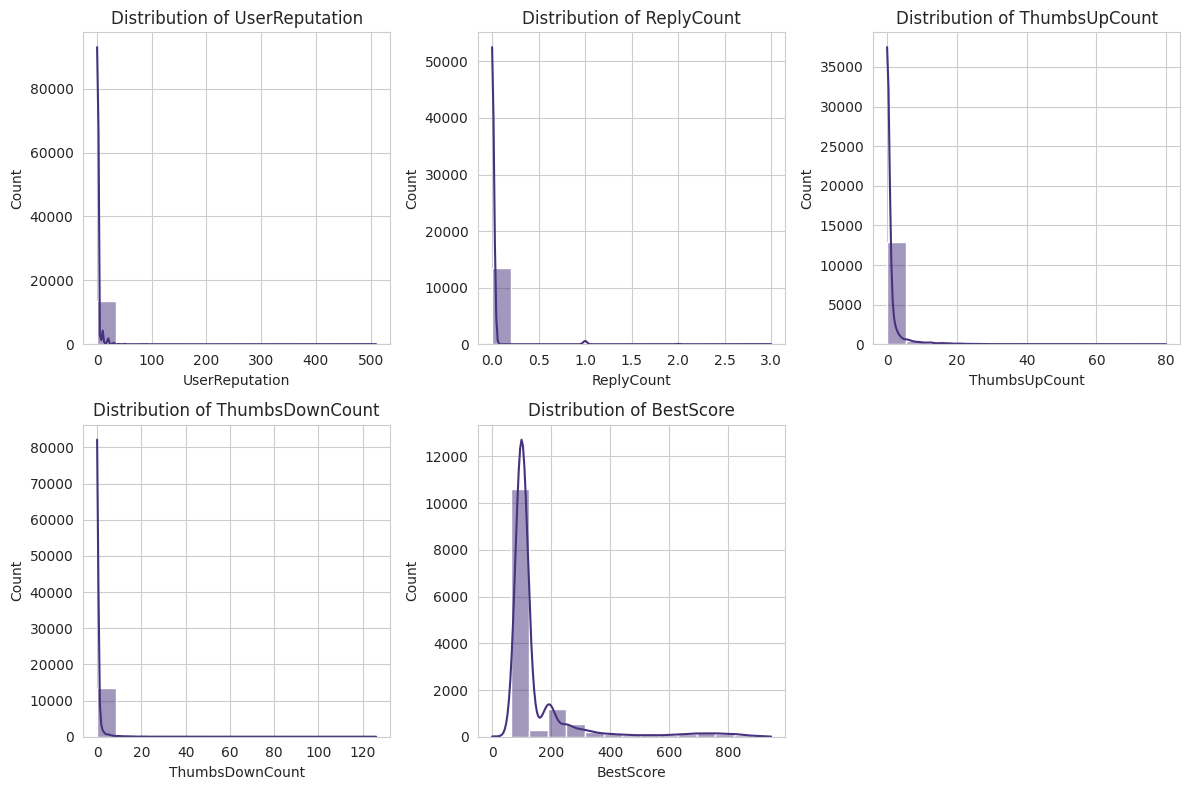

In [ ]:
plt.figure(figsize=(12, 8))
num_features = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']

for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=X, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
X.ReplyCount.value_counts()

ReplyCount
0    13464
1      151
2       16
3        5
Name: count, dtype: int64

In [ ]:
X.UserReputation.value_counts()

UserReputation
1      12708
10       478
20       217
0        118
30        54
50        16
40        12
90         7
80         4
60         4
110        3
510        3
100        3
140        2
70         2
220        1
160        1
130        1
150        1
300        1
Name: count, dtype: int64

In [ ]:
X.BestScore.value_counts()

BestScore
100    10506
193     1074
253      292
142      147
297      124
       ...  
908        1
529        1
119        1
226        1
754        1
Name: count, Length: 525, dtype: int64

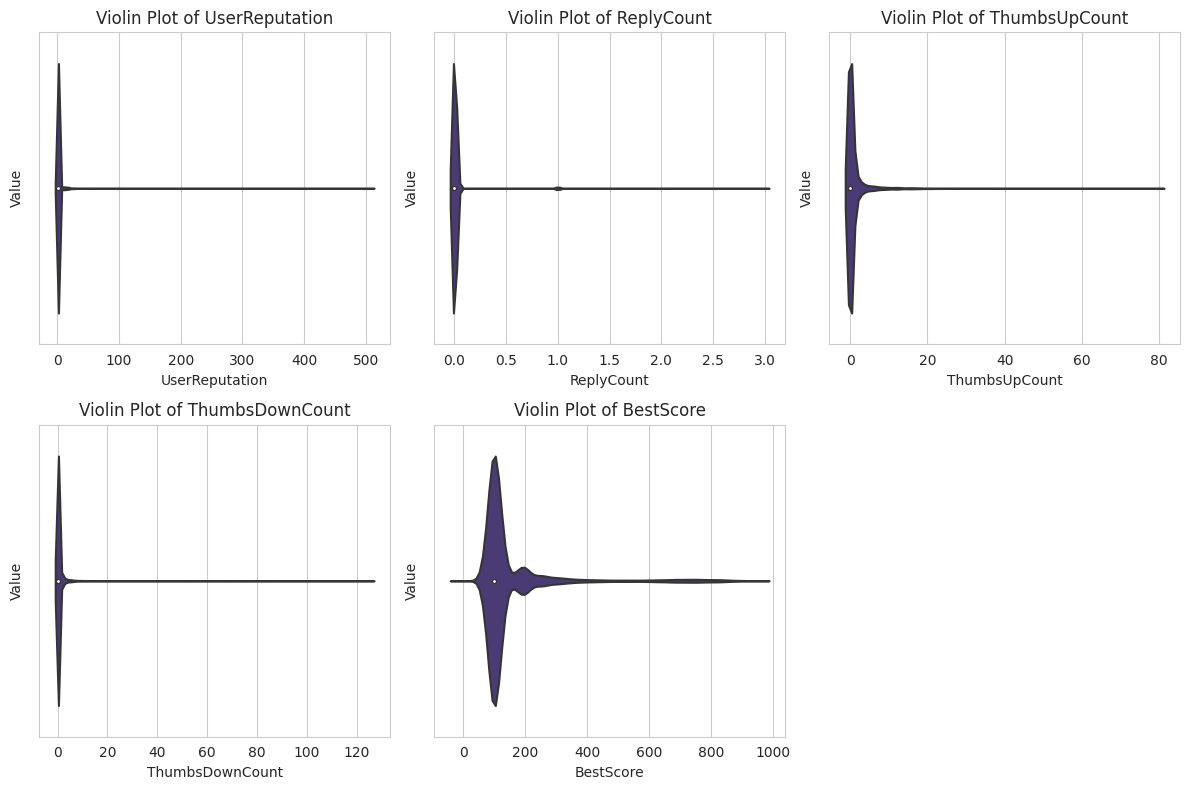

In [ ]:
plt.figure(figsize=(12, 8))

for i, feature in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=feature, data=X)
    plt.title(f'Violin Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

## Correlation heatmap

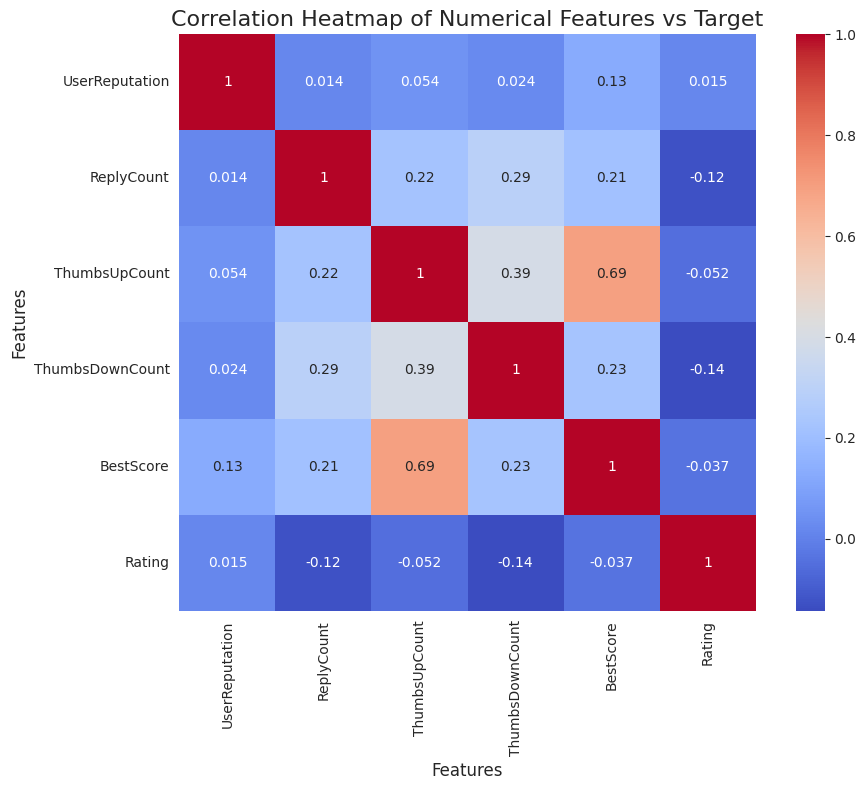

In [ ]:
corr_matrix = X_full[num_features+['Rating']].corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)

plt.title('Correlation Heatmap of Numerical Features vs Target', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()

* ThumbsUpCount is highly correlated with BestScore
* BestScore may be left out of training to avoid redundancy
* No correlation between numerical features and label -> No linear relationship

## Feature Information

<ul>
<li>RecipeName: Name of the recipe the comment was posted on -> <b>Dropped</b> </li>
<li>CommentID: Unique ID of the comment -> <b>Dropped</b> </li>
<li>UserName: Name of the user -> <b>Dropped</b> </li>
</ul>

<ul>
    <li>RecipeNumber: Placement of the recipe on the top 100 recipes list -> <b>Not used</b> </li>
<li>RecipeCode: Unique ID of the recipe used by the site -> <b>Not used</b> </li>
<li>UserID: Unique ID of the user who left the comment -> <b>Not used</b></li>
    <li>CreationTimestamp: Time at which the comment was posted as a Unix timestamp -> <b>Not used</b></li>
    <li>BestScore: Score of the comment, likely used by the site to help determine the order comments appear in -> <b>Not used</b></li>
</ul>

<ul>
<li>UserReputation: Internal score of the site, roughly quantifying the past behavior of the user -> <b>Used</b></li>
<li>ReplyCount: Number of replies to the comment</li>
<li>ThumbsUpCount: Number of up-votes the comment has received</li>
<li>ThumbsDownCount: Number of down-votes the comment has received</li>
    <li>Recipe_Review: Text content of the comment</li>
    </ul>
    
* Rating: The score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given (Target Variable)


# Text Analysis and Cleaning

In [ ]:
# Reconfiguring indexes
X1 = X.reset_index(drop=True)
y1 = y.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [ ]:
# Null Value Removal
X1.dropna(subset=["Recipe_Review"],inplace=True)
y1=y1.iloc[X1.index]

X1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)

In [ ]:
import re

# pattern_presence = pd.DataFrame(index=X.index, columns=patterns.keys())

# for pattern_name, pattern in patterns.items():
#     pattern_presence[pattern_name] = X.str.contains(pattern).astype(int)

# num_dict={col:sum(pattern_presence[col]) for col in pattern_presence.columns}

# pattern_presence
# num_dict

# emoji_counts = X.str.findall(patterns['emoji_pattern']).explode().value_counts()
# out_of_ascii_counts = X.str.findall(patterns['out_of_ascii']).explode().value_counts()
# emoticons = X.str.findall(patterns['emoticons']).explode().value_counts()
# entities = X.str.findall(patterns['html_entities']).explode().value_counts()
# # hanging = X.str.findall(patterns['hanging_parantheses']).explode().value_counts()

# print("Emoji Counts:")
# print(emoji_counts)
# print("\nOut of ASCII Counts:")
# print(out_of_ascii_counts)
# print("\nEmoticons:")
# print(emoticons)
# print("\nEntities:")
# print(entities)
# # print("\nHanging Parantheses:")
# # print(hanging)

# pattern_presence = pd.DataFrame(index=X.index, columns=patterns.keys())

# for pattern_name, pattern in patterns.items():
#     pattern_presence[pattern_name] = X.str.contains(pattern).astype(int)

# num_dict={col:sum(pattern_presence[col]) for col in pattern_presence.columns}

# pattern_presence
# num_dict

# emoji_counts = X.str.findall(patterns['emoji_pattern']).explode().value_counts()
# out_of_ascii_counts = X.str.findall(patterns['out_of_ascii']).explode().value_counts()
# emoticons = X.str.findall(patterns['emoticons']).explode().value_counts()
# entities = X.str.findall(patterns['html_entities']).explode().value_counts()
# # hanging = X.str.findall(patterns['hanging_parantheses']).explode().value_counts()

# print("Emoji Counts:")
# print(emoji_counts)
# print("\nOut of ASCII Counts:")
# print(out_of_ascii_counts)
# print("\nEmoticons:")
# print(emoticons)
# print("\nEntities:")
# print(entities)
# # print("\nHanging Parantheses:")
# # print(hanging)

def replace_patterns(X):

    patterns = {
        'html_entities': r'&[a-zA-Z0-9]+;|&#[a-zA-Z0-9]+;',
        'urls': r'https?://\S+',
        'email_addresses': r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',
        'html_tags': r'<.*>|</.*>|<.*>(.*?)</.*>',
        'whitespace_pattern': r'\s\s+',
        'emoji_pattern': r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F700-\U0001F77F\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F\U0001FA70-\U0001FAFF\U00002702-\U000027B0]+|[\U0001F1E0-\U0001F1FF]{2}|\u200d',
        'emoticons': r'(?::|;|=)(?:-)?(?:\)|\(|D|P)',
        'out_of_ascii': r'[^\x00-\x7F]+'
    }

    replacements = {
        "'": "'",
        """: '"',
        """: '"',
        "é": "e",
        "×": "x",
        "ñ": "n",
        "è": "e",
        "â": "a",
        "½": "0.5",
        "¼": "0.25",
        "⅛": "0.125",
        "'": "'",
        "´": "'",
        r"[:;][o0]\)?": " ",
        r"\.\.*": ", ",
        r"!!*": "!",
        r"--*": "-",
        r",,*": ",",
        r"^re:": "",
        r"\?\?*": "?",
        r"(?<!\\)([_\*~])[\s\S]*?\1": "",
        "&#39;": "'",
        "&amp;": "&",
        "&gt;": " ",
        "&lt;": " ",
        "&#34;": '"'
    }

    contractions = {
        r"\bain't\b": "am not",
        r"\baren't\b": "are not",
        r"\bcan't\b": "can not",
        r"\bcouldn't\b": "could not",
        r"\bdidn't\b": "did not",
        r"\bdoesn't\b": "does not",
        r"\bdon't\b": "do not",
        r"\bhadn't\b": "had not",
        r"\bhasn't\b": "has not",
        r"\bhaven't\b": "have not",
        r"\bhe'd\b": "he would",
        r"\bhe'll\b": "he will",
        r"\bhe's\b": "he is",
        r"\bi'd\b": "i would",
        r"\bi'll\b": "i will",
        r"\bi'm\b": "i am",
        r"\bi've\b": "i have",
        r"\bisn't\b": "is not",
        r"\bit's\b": "it is",
        r"\blet's\b": "let us",
        r"\bma'am\b": "madam",
        r"\bmayn't\b": "may not",
        r"\bmight've\b": "might have",
        r"\bmightn't\b": "might not",
        r"\bmust've\b": "must have",
        r"\bmustn't\b": "must not",
        r"\bshan't\b": "shall not",
        r"\bshe'd\b": "she would",
        r"\bshe'll\b": "she will",
        r"\bshe's\b": "she is",
        r"\bshould've\b": "should have",
        r"\bshouldn't\b": "should not",
        r"\bthat's\b": "that is",
        r"\bthere's\b": "there is",
        r"\bthey'd\b": "they would",
        r"\bthey'll\b": "they will",
        r"\bthey're\b": "they are",
        r"\bthey've\b": "they have",
        r"\bwasn't\b": "was not",
        r"\bwe'd\b": "we would",
        r"\bwe'll\b": "we will",
        r"\bwe're\b": "we are",
        r"\bwe've\b": "we have",
        r"\bweren't\b": "were not",
        r"\bwhat'll\b": "what will",
        r"\bwhat're\b": "what are",
        r"\bwhat's\b": "what is",
        r"\bwhat've\b": "what have",
        r"\bwhere's\b": "where is",
        r"\bwho'll\b": "who will",
        r"\bwho's\b": "who is",
        r"\bwon't\b": "will not",
        r"\bwould've\b": "would have",
        r"\bwouldn't\b": "would not",
        r"\byou'd\b": "you would",
        r"\byou'll\b": "you will",
        r"\byou're\b": "you are",
        r"\byou've\b": "you have"
    }

    custom_stop_words = {
        r"\badded\b": "add",
        r"\bcups\b": "cup",
        r"\bloved\b": "love",
        r"\bloves\b": "love",
        r"\bliked\b": "like",
        r"\brecipes\b": "recipe",
        r"\bthanks\b": "thank",
        r"\btasty\b": "taste",
        r"\bcooked\b": "cook",
        r"\badding\b": "add",
        r"\bmade\b": "make",
        r"\bmaking\b": "make",
        r"\bmakes\b": "make",
        r"\bthought\b": "think",
        r"\btimes\b": "time",
        r"\btried\b": "try",
        r"\bused\b":"use",
    }

    X = X.str.lower()

    X = X.str.replace(patterns['emoji_pattern'], " ", regex=True)
    X = X.str.replace(patterns['emoticons'], " ", regex=True)
    X = X.str.replace(patterns['out_of_ascii'], " ", regex=True)
    X = X.str.replace(patterns['html_tags'], " ", regex=True)
    X = X.str.replace(patterns['urls'], " ", regex=True)
    X = X.str.replace(patterns['email_addresses'], " ", regex=True)

    my_punct = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '.',
        '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_',
        '`', '{', '|', '}', '~', '»', '«', '“', '”']


    X = X.replace(replacements, regex=True)
    X = X.replace(contractions, regex=True)

    punct_pattern = re.compile("[" + re.escape("".join(my_punct)) + "]")
    X=X.apply(lambda x:re.sub(punct_pattern, "", x))
    X = X.replace(custom_stop_words, regex=True)
    with open('../input/dataset/stopwords.txt', 'r') as file:
        stopwords = file.read().splitlines()


    stopwords_pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
    X = X.str.replace(stopwords_pattern, '', regex=True)

    X = X.str.replace(patterns['whitespace_pattern'], " ", regex=True)

    return X

{'html_entities': 5010,
 'urls': 26,
 'email_addresses': 6,
 'html_tags': 81,
 'whitespace_pattern': 6291,
 'emoji_pattern': 15,
 'emoticons': 328,
 'out_of_ascii': 594}

Emoji Counts:
Recipe_Review
😋      3
❤      2
😍      2
‍      2
😋❤🤗    1
🙄🤦🏽    1
🥰🥰🥰    1
🥰      1
🤗      1
😅      1
😝      1
🙄😑     1
🤣      1
🤦      1
Name: count, dtype: int64

Out of ASCII Counts:
Recipe_Review
’          711
           156
“           79
”           76
é           42
°           16
…           12
—            7
ñ            7
             5
½            5
¼            4
‘            4
😋            3
è            3
❤️           2
º            2
😍            2
â            2
😅            1
😝            1
🙄😑           1
–            1
⅛            1
🤣            1
🤦‍♀️         1
🥰            1
🤗            1
•            1
🥰🥰🥰          1
🙄🤦🏽‍♀️       1
😋❤🤗          1
☺️           1
´¯           1
¸¸           1
             1
×            1
´            1
Name: count, dtype: int64

Emoticons:
Recipe_Review
:)     243
:-)     40
;)      29
:(      19
=)       8
;-)      7
Name: count, dtype: int64

Entities:
Recipe_Review
&#39;    7209
&#34;    1342
&amp;     775
&gt;        8
&lt;        7
Name: count, dtype: int64

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.feature_extraction.text import TfidfVectorizer
import string

# Estimator TfidfTransformer should store all parameters as an attribute during init.
#Please remember all these comments when you do another ml project... every one of these took hours to debug!

class TfidfTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, ngram_range=(1, 1), max_features=100):
        self.max_features=max_features
        self.ngram_range=ngram_range
        self.vectorizer = TfidfVectorizer(stop_words=None, lowercase=False, strip_accents=None, ngram_range=self.ngram_range, max_features=self.max_features)

    def fit(self, X, y=None):
        self.vectorizer.fit(X.squeeze())
        return self

    def transform(self, X, y=None):
        return self.vectorizer.transform(X.squeeze())

    def get_feature_names_out(self, input_features=None):
#         print(self.vectorizer.get_feature_names_out())
        return self.vectorizer.get_feature_names_out()

# Use this to check correctness but don't take it too seriously.. solve error one by one and then again check if custom transformer works

# from sklearn.utils.estimator_checks import check_estimator
# check_estimator(TfidfTransformer())

In [ ]:
# HAVING REPLACE INSIDE OF PIPELINE AND RUNNING IT EVERYTIME DURING CV IS USELESS AS REPLACE CODE IS FIXED AND IT HAS NOTHING TO LEARN FROM THE INDIVIDUAL CV SPLITS
X2=X1.copy(deep=True)
X2.Recipe_Review=replace_patterns(X1.Recipe_Review)
y2=y1

# Pipelines

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif,RFE,SelectKBest,f_classif
from sklearn.model_selection import GridSearchCV, train_test_split

import pickle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

rs=42

In [ ]:
UserReputation_preprocess=make_pipeline(StandardScaler())
ReplyCount_preprocess=make_pipeline(StandardScaler())
ThumbsUpCount_preprocess=make_pipeline(StandardScaler())
ThumbsDownCount_preprocess=make_pipeline(StandardScaler())

# Using the TfidfVectorizer only for the purposes of 'Splitting' that is separating sentences into words, 'frequency counting', 'tf*idf' and finally 'normalization'
# Manual lemmatization, lowercase conversion,accent stripping, stop word removal has been done via replace_patterns() as stop word removal and identification of tfidf is pathetic in sklearn!
# Another reason is for optimization! Only the above(1st comment) procedures are dynamic that is "need to be repeated in a cv loop"
# 2nd comment procedures remain common be it any split of a cv loop!

# NEVER APPLY TRANSFORMERS PERTAINING TO THE SAME COLUMN IN TWO DIFFERENT ITERATIONS!!!! ex: Applying below functiontransformer in one row and then custom transformer in the next even though both pertain to the same column 'Recipe_Reviews'
# Go with custom transformer whenever you are adding new columns, cos function_transformer's get_feature_names_out causes problems otherwise

preprocess = make_column_transformer(
    (UserReputation_preprocess, ['UserReputation']),
    (ReplyCount_preprocess, ['ReplyCount']),
    (ThumbsUpCount_preprocess, ['ThumbsUpCount']),
    (ThumbsDownCount_preprocess, ['ThumbsDownCount']),
    # (make_pipeline(FunctionTransformer(replace_patterns, feature_names_out='one-to-one'),TfidfTransformer()), ['Recipe_Review']),
    (TfidfTransformer(),['Recipe_Review']),
    remainder='drop',
    n_jobs=-1,
    verbose_feature_names_out=False,
    sparse_threshold=0,
)

In [ ]:
temp=pd.DataFrame(preprocess.fit_transform(X2),columns=preprocess.get_feature_names_out())
temp

,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,absolutely,add,also,always,amazing,banana,...,try,use,very,water,way,well,whole,wonderful,years,yummy
0,1.768603,-0.10575,-0.263626,-0.166511,0.0,0.188227,0.0,0.0,0.0,0.0,...,0.0,0.170398,0.211200,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.115050,-0.10575,-0.263626,0.139695,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.404568,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13629,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.179582,0.222583,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13630,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13631,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.651948,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13632,-0.115050,-0.10575,-0.263626,-0.166511,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Models

In [ ]:
# with open('svc_clf.pkl', 'wb') as file:
#     pickle.dump(svc_clf, file)

In [ ]:
# with open('../input/dataset/xgb_clf.pkl', 'rb') as file:
#     xgb_clf = pickle.load(file)

In [ ]:
# from google.colab import files
# from google.colab import drive

# with open('lg_clf_rfe.pkl', 'wb') as file:
#     pickle.dump(lg_clf, file)

# # try:
# files.download('lg_clf_rfe.pkl')
# # except:
# #     drive.mount('/content/drive')

# #     !cp lg_clf.pkl /content/drive/MyDrive/


In [ ]:
# with open('text.csv', 'w') as file:
#     X2.Recipe_Review.to_csv(file, index=False, header=False)
# with open('svc_clf.pkl', 'w') as file:
    # X1.to_csv(file, index=False)

## KNeighborsClassifier

In [ ]:
# param_grid = [
#     {    'kneighborsclassifier__n_neighbors': range(60,111,10),
#     'kneighborsclassifier__weights': ['uniform','distance'],
#     'selectkbest__k': [120,200],
#     'selectkbest__score_func':[mutual_info_classif,f_classif],
#     'columntransformer__tfidftransformer__max_features': [400],},
#     ]

param_grid={
    'columntransformer__tfidftransformer__max_features': [300],
    'kneighborsclassifier__n_neighbors': [70],
    'kneighborsclassifier__weights': ['uniform'],
    'selectkbest__k': [90],
    'selectkbest__score_func': [f_classif],
}

knc_clf= GridSearchCV(make_pipeline(
    preprocess,
    SelectKBest(mutual_info_classif),
    KNeighborsClassifier(),
    ),
                              param_grid,
                              scoring='accuracy',
                              cv=5,
                              n_jobs=-1,
                              refit=True,
                              verbose=4,
                              error_score=-1,
                              return_train_score=True
)

In [ ]:
# knc_clf.fit(X2,y2)
# print("Best parameters: ", knc_clf.best_params_)
# print("Best score: ", knc_clf.best_score_)
# print("Mean test scores: ", knc_clf.cv_results_['mean_test_score'])
# print("Mean train scores: ", knc_clf.cv_results_['mean_train_score'])
# print("Results: ",knc_clf.cv_results_)

# weights: distance giving >0.9 on entire train while unifrom gives 0.76 on both
# 'distance' did overfit the data with 0.75 test score... best estimator gave test score of 0.7619

# test: 0.76763998 train: 0.9889064 {'columntransformer__tfidftransformer__max_features': 400, 'kneighborsclassifier__n_neighbors': 70, 'kneighborsclassifier__weights': 'distance', 'selectkbest__k': 120, 'selectkbest__score_func': <function f_classif at 0x7f3275a46e60>}
# test: 0.76199218 train: 0.76212043 {'columntransformer__tfidftransformer__max_features': 300, 'kneighborsclassifier__n_neighbors': 70, 'kneighborsclassifier__weights': 'uniform', 'selectkbest__k': 90, 'selectkbest__score_func': <function f_classif at 0x7f3275a46e60>}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:  {'columntransformer__tfidftransformer__max_features': 300, 'kneighborsclassifier__n_neighbors': 70, 'kneighborsclassifier__weights': 'uniform', 'selectkbest__k': 90, 'selectkbest__score_func': <function f_classif at 0x7ba5f891ce50>}
Best score:  0.7619921811207777
Mean test scores:  [0.76199218]
Mean train scores:  [0.76212043]
Results:  {'mean_fit_time': array([1.16376157]), 'std_fit_time': array([0.16239081]), 'mean_score_time': array([1.0347589]), 'std_score_time': array([0.18344986]), 'param_columntransformer__tfidftransformer__max_features': masked_array(data=[300],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kneighborsclassifier__n_neighbors': masked_array(data=[70],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_kneighborsclassifier__weights': masked_array(data=['uniform'],
             mask=[False],
       fill_value='?',
    

## Logistic

In [ ]:
# param_grid = [
#     {
#     'logisticregression__C': [0.1,1,10],
#     'logisticregression__penalty': ['l2'], #f
#     'logisticregression__solver': ['lbfgs','newton-cholesky'], #f
#     'logisticregression__class_weight': [None,'balanced'], #f
#     'logisticregression__tol': [1e-3,1e-4], #f

#     # 'rfe__n_features_to_select':[100],
#     'selectkbest__k': [1000],
#     'selectkbest__score_func':[f_classif,mutual_info_classif],
#     'columntransformer__tfidftransformer__max_features': [2000],
#     'columntransformer__tfidftransformer__ngram_range': [(1,1),(1,2),(1,3)],
#     },
#     {
#     'logisticregression__C':[0.1,1,10],
#     'logisticregression__penalty': ['elasticnet'],
#     'logisticregression__solver': ['saga'],
#     'logisticregression__class_weight': [None],
#     'logisticregression__tol': [1e-3,1e-4,1e-2],
#     'logisticregression__l1_ratio': [0.5], #0.7645593735211135
#     # Best parameters:  {'logisticregression__l1_ratio': 0.5, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga', 'logisticregression__tol': 0.0001}

#     'selectkbest__k': [200],
#     'selectkbest__score_func':[f_classif,mutual_info_classif],
#     # 'rfe__n_features_to_select':[120,200],
#     'columntransformer__tfidftransformer__max_features': [400],
#     },
#      ]

param_grid={
    'columntransformer__tfidftransformer__max_features': [2000],
    'logisticregression__C': [1],
    'logisticregression__class_weight': [None],
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs'],
    'logisticregression__tol': [1e-3],
    'selectkbest__k': [1000],
    'selectkbest__score_func': [f_classif],
    'columntransformer__tfidftransformer__ngram_range': [(1,3)],
                                }

LogReg=LogisticRegression(multi_class='auto',
                          random_state=rs,
                        #   verbose=1,
                          dual=False,
                          fit_intercept=True,

                          max_iter=10000,
                          class_weight=None,
                          solver='newton-cholesky',
                          warm_start=True,
                          l1_ratio=None,
                          penalty='l2',
                          tol=1e-3,
                          C=1,
                          intercept_scaling=1,
                           )

lg_clf = GridSearchCV(
    make_pipeline(
        preprocess,
        SelectKBest(),
        # RFE(LogReg,
        #       verbose=1,

        #       n_features_to_select=20,
        #       step=1,
        #       ),
        LogReg
        ),

    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=4,
    error_score='raise',
    return_train_score=True,
    )


In [ ]:
# lg_clf.fit(X2,y2)
# print("Best parameters: ", lg_clf.best_params_)
# print("Best score: ", lg_clf.best_score_)
# print("Mean test scores: ", lg_clf.cv_results_['mean_test_score'])
# print("Mean train scores: ", lg_clf.cv_results_['mean_train_score'])
# print("Results: ",lg_clf.cv_results_)

# balanced gives pathetic results
# C = 1 or 10 seems to be the way
# lbfgs & cholesky seems to perform better
# f_classif dominates... rfe too slow can't implement

# 0.76734664, 0.77480932 {'columntransformer__tfidftransformer__max_features': 200, 'logisticregression__C': 10, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs', 'logisticregression__tol': 0.001, 'selectkbest__k': 100, 'selectkbest__score_func': <function f_classif at 0x7fd7acec6c20>}

# 0.77050059, 0.78669138 {'columntransformer__tfidftransformer__max_features': 800, 'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs', 'logisticregression__tol': 0.001, 'selectkbest__k': 400, 'selectkbest__score_func': <function f_classif at 0x7fd7acec6c20>}
# less overfitting when compared to svc similar 400/800 features and hence test score also better CUTOFF CROSSED -> 0.77430
# upto 0.77204, 0.7954 at 1000/2000 features (pretty fast execution as well)

#0.77299 ngram=(1,3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters:  {'columntransformer__tfidftransformer__max_features': 2000, 'columntransformer__tfidftransformer__ngram_range': (1, 3), 'logisticregression__C': 1, 'logisticregression__class_weight': None, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs', 'logisticregression__tol': 0.001, 'selectkbest__k': 1000, 'selectkbest__score_func': <function f_classif at 0x7ba5f891ce50>}
Best score:  0.7728474608282545
Mean test scores:  [0.77284746]
Mean train scores:  [0.79620803]
Results:  {'mean_fit_time': array([24.83867202]), 'std_fit_time': array([3.82702521]), 'mean_score_time': array([0.51691217]), 'std_score_time': array([0.09492597]), 'param_columntransformer__tfidftransformer__max_features': masked_array(data=[2000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_columntransformer__tfidftransformer__ngram_range': masked_array(data=[(1, 3)],
             mask=[Fa

## SVC

In [ ]:
# param_grid = {
#     'svc__C': [1,10], #f
#     'svc__kernel': ['linear','rbf','poly'], #f
#     'svc__gamma': ['scale','auto'], #f
#     'svc__tol': [1e-2,1e-3], #f
#     'svc__max_iter': [100000], #f
#     'svc__class_weight': [None,'balanced'], #f
#     'svc__degree':[2,3],

#     'selectkbest__score_func':[f_classif,mutual_info_classif], #chi2 works only with +ve values but tfidf produces -ve values as well

#     'selectkbest__k': [30],
#     'columntransformer__tfidftransformer__max_features': [100],
#     'columntransformer__tfidftransformer__ngram_range': [(1,1),(1,2),(1,3)],
# }

param_grid = {
    'svc__C': [10], #f
    'svc__kernel': ['rbf'], #f
    'svc__gamma': ['scale'], #f
    'svc__tol': [1e-2], #f
    'svc__max_iter': [1000000], #f
    'svc__class_weight': [None], #f

    'selectkbest__score_func':[f_classif], #chi2 works only with +ve values but tfidf produces -ve values as well

    'selectkbest__k': [1000],
    'preprocessor__tfidftransformer__max_features': [2000],
    'preprocessor__tfidftransformer__ngram_range': [(1,3)],
#     'smote__k_neighbors':[5],
}

svc=SVC(random_state=rs)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocess),
#     ('smote', smote),
    ('selectkbest', SelectKBest(f_classif, k=30)),
    ('svc', svc),
])

svc_clf = GridSearchCV(
    pipeline,
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=4,
    error_score='raise',
    return_train_score=True,
    )

In [ ]:
svc_clf.fit(X2,y2)
print("Best parameters: ", svc_clf.best_params_)
print("Best score: ", svc_clf.best_score_)
print("Mean test scores: ", svc_clf.cv_results_['mean_test_score'])
print("Mean train scores: ", svc_clf.cv_results_['mean_train_score'])
print("Results: ",svc_clf.cv_results_)

#rbf overfitting... linear can't `cross 0.765512 but doens't overfit
# f_classif seems better
# 0.765512, 0.77895338 {'columntransformer__tfidftransformer__max_features': 400, 'selectkbest__k': 200, 'selectkbest__score_func': <function f_classif at 0x7f7d1a7aa7a0>, 'svc__C': 10, 'svc__class_weight': None, 'svc__degree': 2, 'svc__gamma': 'scale', 'svc__kernel': 'linear', 'svc__max_iter': 50000, 'svc__tol': 0.01}
# 0.76661307, 0.8299472 {'columntransformer__tfidftransformer__max_features': 400, 'selectkbest__k': 200, 'selectkbest__score_func': <function f_classif at 0x7f83511b6560>, 'svc__C': 10, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 100000, 'svc__tol': 0.01}

# 0.7700603, 0.86742704 PASSED CUTOFF {'columntransformer__tfidftransformer__max_features': 800, 'selectkbest__k': 400, 'selectkbest__score_func': <function f_classif at 0x7f83511b6560>, 'svc__C': 10, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__max_iter': 100000, 'svc__tol': 0.01}
# little bit overfitting
# 0.77167382, 0.90439336 for 1000 out of 2000 features with ngram(1,3) -> test score 0.77518

# smote greatly reduces test as well as train scores upto 0.6788 and is very very compute intensive even for just 5 neighbors

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END columntransformer__tfidftransformer__max_features=300, kneighborsclassifier__n_neighbors=70, kneighborsclassifier__weights=uniform, selectkbest__k=90, selectkbest__score_func=<function f_classif at 0x7d3099d21b40>;, score=(train=0.762, test=0.761) total time=   2.4s
[CV 5/5] END columntransformer__tfidftransformer__max_features=300, kneighborsclassifier__n_neighbors=70, kneighborsclassifier__weights=uniform, selectkbest__k=90, selectkbest__score_func=<function f_classif at 0x7d3099d21b40>;, score=(train=0.762, test=0.763) total time=   1.5s
[CV 3/5] END columntransformer__tfidftransformer__max_features=2000, columntransformer__tfidftransformer__ngram_range=(1, 3), logisticregression__C=1, logisticregression__class_weight=None, logisticregression__penalty=l2, logisticregression__solver=lbfgs, logisticregression__tol=0.001, selectkbest__k=1000, selectkbest__score_func=<function f_classif at 0x7d3099d21b40>;, score=(t

/opt/conda/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END columntransformer__tfidftransformer__max_features=300, kneighborsclassifier__n_neighbors=70, kneighborsclassifier__weights=uniform, selectkbest__k=90, selectkbest__score_func=<function f_classif at 0x79fc3b381b40>;, score=(train=0.762, test=0.760) total time=   2.3s
[CV 4/5] END columntransformer__tfidftransformer__max_features=2000, columntransformer__tfidftransformer__ngram_range=(1, 3), logisticregression__C=1, logisticregression__class_weight=None, logisticregression__penalty=l2, logisticregression__solver=lbfgs, logisticregression__tol=0.001, selectkbest__k=1000, selectkbest__score_func=<function f_classif at 0x79fc3b381b40>;, score=(train=0.796, test=0.776) total time=  26.6s
[CV 4/5] END preprocessor__tfidftransformer__max_features=2000, preprocessor__tfidftransformer__ngram_range=(1, 3), selectkbest__k=1000, selectkbest__score_func=<function f_classif at 0x79fc3b381b40>, svc__C=10, svc__class_weight=None, svc__gamma=scale, svc__kernel=rbf, svc__max_iter=1000000, sv

In [ ]:
X_train1, X_test1, y_train1, y_test1=train_test_split(X2,y2,test_size=0.2,random_state=rs,stratify=y2)

best_svc = svc_clf.best_estimator_
y_pred=best_svc.predict(X_test1)

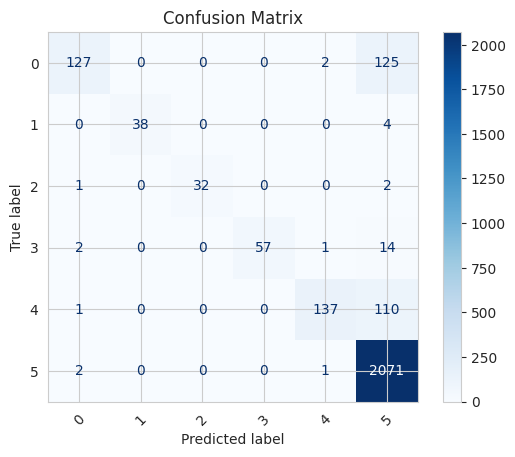

In [ ]:
cm = confusion_matrix(y_test1,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_clf.best_estimator_.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred, average='weighted')
recall = recall_score(y_test1, y_pred, average='weighted')
f1 = f1_score(y_test1, y_pred, average='weighted')

metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
}

df = pd.DataFrame(metrics)

df.set_index('Metric', inplace=True)

print("Weighted Evaluation Metrics:")
print(df)

Weighted Evaluation Metrics:
              Value
Metric             
Accuracy   0.902824
Precision  0.909840
Recall     0.902824
F1 Score   0.891643


In [ ]:
accuracy = accuracy_score(y_test1, y_pred)
precision = precision_score(y_test1, y_pred, average=None)
recall = recall_score(y_test1, y_pred, average=None)
f1 = f1_score(y_test1, y_pred, average=None)

metrics = {
    'Metric': ['0', '1', '2', '3','4','5'],
    'Accuracy': accuracy,
    'Precision':precision,
    'Recall':recall,
    'F1':f1,
}

df = pd.DataFrame(metrics)

df.set_index('Metric', inplace=True)

print("Evaluation Metrics:")
print(df)

Evaluation Metrics:
        Accuracy  Precision    Recall        F1
Metric                                         
0       0.902824   0.954887  0.500000  0.656331
1       0.902824   1.000000  0.904762  0.950000
2       0.902824   1.000000  0.914286  0.955224
3       0.902824   1.000000  0.770270  0.870229
4       0.902824   0.971631  0.552419  0.704370
5       0.902824   0.890370  0.998554  0.941364


## XGBoost

In [ ]:
param_grid = {
    'columntransformer__tfidftransformer__max_features': [2000],
    'selectkbest__score_func': [f_classif],
    'selectkbest__k': [1000],

    'xgbclassifier__max_depth': [3],
    'xgbclassifier__learning_rate': [0.05],
    'xgbclassifier__n_estimators': [250],
    'xgbclassifier__subsample': [0.5],
}

xgb = XGBClassifier(random_state=rs)

xgb_clf = GridSearchCV(
    make_pipeline(
        preprocess,
        SelectKBest(f_classif, k=30),
        xgb
    ),
    param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=4,
    error_score='raise',
    return_train_score=True
)

# compute intensive
# best score obtained was 0.7667

In [ ]:
# xgb_clf.fit(X2,y2)
# print("Best parameters: ", xgb_clf.best_params_)
# print("Best score: ", xgb_clf.best_score_)
# print("Mean test scores: ", xgb_clf.cv_results_['mean_test_score'])
# print("Mean train scores: ", xgb_clf.cv_results_['mean_train_score'])
# print("Results: ",xgb_clf.cv_results_)

# Compute intensive
# 0.76698002, 0.78920348 {'columntransformer__tfidftransformer__max_features': 1000, 'selectkbest__k': 500, 'selectkbest__score_func': <function f_classif at 0x7fbd370aa9d0>, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__subsample': 0.5}

Best parameters:  {'columntransformer__tfidftransformer__max_features': 1000, 'selectkbest__k': 500, 'selectkbest__score_func': <function f_classif at 0x7fbd370aa9d0>, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__subsample': 0.5}
Best score:  0.7669800191073154
Mean test scores:  [0.76698002]
Mean train scores:  [0.78920348]
Results:  {'mean_fit_time': array([554.28579631]), 'std_fit_time': array([1.81006918]), 'mean_score_time': array([0.2647295]), 'std_score_time': array([0.08943181]), 'param_columntransformer__tfidftransformer__max_features': masked_array(data=[1000],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_selectkbest__k': masked_array(data=[500],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_selectkbest__score_func': masked_array(data=[<function f_classif at 0x7fbd370aa9d0>],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__learning_rate': masked_array(data=[0.05],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__max_depth': masked_array(data=[3],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__n_estimators': masked_array(data=[250],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_xgbclassifier__subsample': masked_array(data=[0.5],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'columntransformer__tfidftransformer__max_features': 1000, 'selectkbest__k': 500, 'selectkbest__score_func': <function f_classif at 0x7fbd370aa9d0>, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__subsample': 0.5}], 'split0_test_score': array([0.76420975]), 'split1_test_score': array([0.76274294]), 'split2_test_score': array([0.77007701]), 'split3_test_score': array([0.76530986]), 'split4_test_score': array([0.77256053]), 'mean_test_score': array([0.76698002]), 'std_test_score': array([0.00371887]), 'rank_test_score': array([1], dtype=int32), 'split0_train_score': array([0.79095993]), 'split1_train_score': array([0.79040983]), 'split2_train_score': array([0.78857614]), 'split3_train_score': array([0.7876593]), 'split4_train_score': array([0.78841217]), 'mean_train_score': array([0.78920348]), 'std_train_score': array([0.00126052])}

# Submit File Generation

In [ ]:
# Preprocess the test data
X1_test = X_test.copy(deep=True)
X1_test['Recipe_Review'] = replace_patterns(X_test['Recipe_Review'])

# When you call clf.predict(X1_test), it will apply only the transform methods of the pipeline components to the preprocessed test data X1_test. It will not call the fit methods again.
#The estimator pipeline has already been trained on the entire X_train by gridsearch
# best_estimator_ basically contains the entire pipeline which you passed to Gridsearchcv fitted on the entire X you passed it

predictions = svc_clf.best_estimator_.predict(X1_test)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({'Rating': predictions},index=range(1,4547))
output.to_csv('submission.csv', index_label="ID")

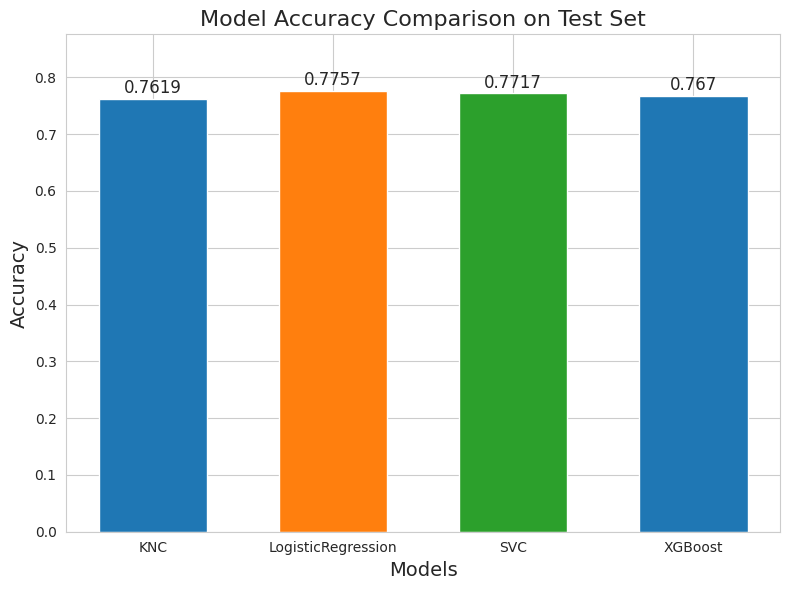

In [ ]:
model1_acc = 0.7619
model2_acc = 0.7757
model3_acc = 0.7717
model4_acc = 0.7670

models = ['KNC', 'LogisticRegression', 'SVC','XGBoost']
accuracies = [model1_acc, model2_acc, model3_acc,model4_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.6)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison on Test Set', fontsize=16)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), fontsize=12, ha='center')

plt.ylim(0, max(accuracies) + 0.1)

plt.tight_layout()
plt.show()

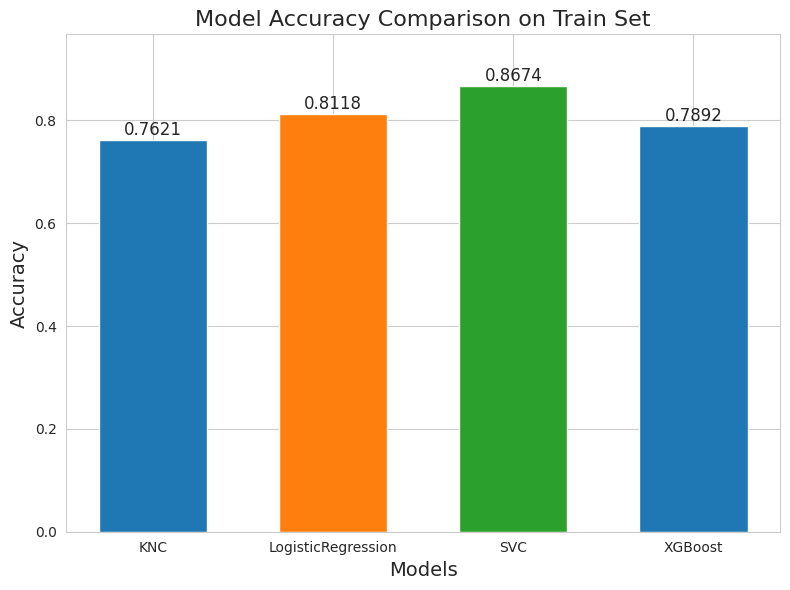

In [ ]:
model1_acc = 0.7621
model2_acc = 0.8118
model3_acc = 0.8674
model4_acc = 0.7892

models = ['KNC', 'LogisticRegression', 'SVC','XGBoost']
accuracies = [model1_acc, model2_acc, model3_acc,model4_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c'], width=0.6)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Comparison on Train Set', fontsize=16)

for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, str(round(v, 4)), fontsize=12, ha='center')

plt.ylim(0, max(accuracies) + 0.1)

# Display the plot
plt.tight_layout()
plt.show()